In [1]:
#1) Download the data file above and read it into a pandas DataFrame.

import pandas as pd

In [2]:
#2) Add the code necessary to describe the dataset

data = pd.read_csv("C:/Users/migue/OneDrive/Documentos/4. Babson/1. Miguel Torrealba Schwarz/8. Semester 2/2.OIM7502_Advanced_Programming/OIM_7502_classwork/homes.csv")

data.describe()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,170.360000,178.340000,21.120000,8.060000,3.820000,1.860000,30.220000,1.020600,3706.100000
std,72.755885,79.382723,8.351072,1.284285,0.690755,0.756199,30.962314,1.191496,1579.915268
min,87.000000,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,135.000000,140.000000,17.000000,7.000000,3.000000,1.000000,12.250000,0.382500,3107.000000
50%,152.000000,160.000000,20.000000,8.000000,4.000000,2.000000,24.500000,0.550000,3490.000000
75%,182.250000,190.000000,22.750000,9.000000,4.000000,2.000000,37.000000,1.182500,3919.250000
max,567.000000,625.000000,64.000000,12.000000,6.000000,4.000000,202.000000,6.490000,12192.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sell       50 non-null     int64  
 1    "List"    50 non-null     int64  
 2    "Living"  50 non-null     int64  
 3    "Rooms"   50 non-null     int64  
 4    "Beds"    50 non-null     int64  
 5    "Baths"   50 non-null     int64  
 6    "Age"     50 non-null     int64  
 7    "Acres"   50 non-null     float64
 8    "Taxes"   50 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 3.6 KB


3) Using markdown commentary describe the dataset

This dataset represents information about houses, where each row corresponds to a different house. The data set contains 50 rows and 9 columns. Considering the data info, we can tell that the dataset is complete with no null values.
The columns aim to offer the characteristics and insights of various features of the houses, including:

Sell: describes the selling price of houses, in this case an average of $170.36, with a minimum of $87 and a maximum of $567

List: describes the listing price, the average is $178.34, ranging from a minimum of $90 to a maximum of $625.

Living: describes the living space, the average is 21.12 square units, with a minimum of 10 and a maximum of 64.

Rooms: describes the number of rooms, the average is 8.06, ranging from a minimum of 5 to a maximum of 12.

Beds: describes the number of bedrooms, the average is 3.82, with a minimum of 3 and a maximum of 6.

Baths: describes the baths, the average 1.86 bathrooms, with a minimum of 1 and a maximum of 4.

Age: describes how old is the house, the average is 30.22 years, with a minimum of 2 years and a maximum of 202 years.

Acres: describes the land area is 1.02 acres, ranging from 0.22 acres to 6.49 acres.

Taxes: describes how much to pay in property tax, where the average is $3706.10, with a minimum of $1445 and a maximum of $12192.


Text(0, 0.5, 'Frequency')

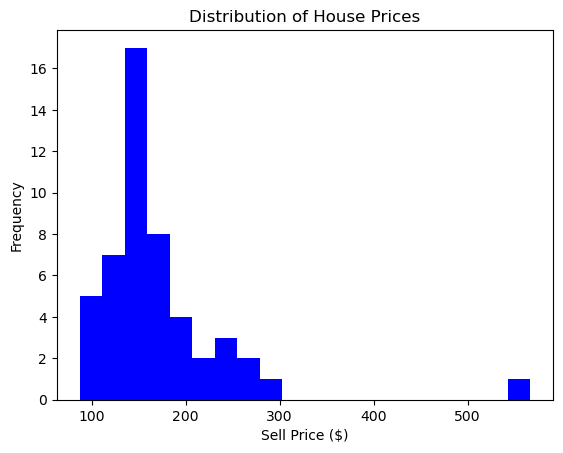

In [4]:
#4) Conduct at least three EDA techniques on the dataset, include markdown commentary to describe what you are doing,
#why you are doing it and the results of each analysis

#To conduct an EDA techniques we import matoplot and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#4.a Histogram

plt.hist(data['Sell'],bins = 20, color='b')
plt.title('Distribution of House Prices')
plt.xlabel('Sell Price ($)')
plt.ylabel('Frequency')

We begin with a historgram to udnerstand the frequency by sell price, meaning how many houses are sell depending on the price. We can observe that the distribution is similar to a normal skewed to the right. There is an outlier far right moving the distribution, but the majority of the houses are sold in the 150

Index(['Sell', ' "List"', ' "Living"', ' "Rooms"', ' "Beds"', ' "Baths"',
       ' "Age"', ' "Acres"', ' "Taxes"'],
      dtype='object')


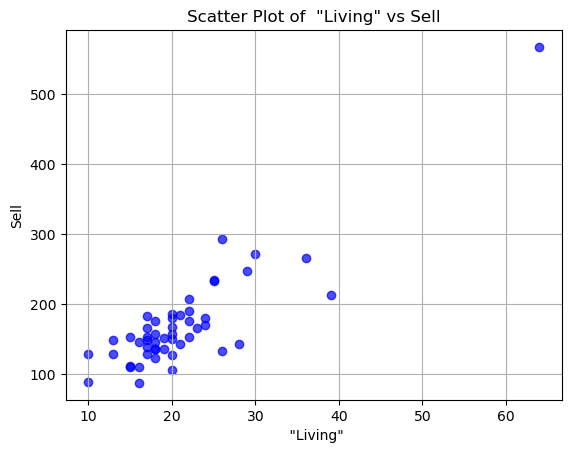

In [5]:
#4.b Scatterplot

print(data.columns)

column_0 = 'Sell'
column_1 = ' "List"'
column_2 = ' "Living"'
column_3 = ' "Rooms"'
column_4 = ' "Beds"'
column_5 = ' "Baths"'
column_6 = ' "Age"'
column_7 = ' "Acres"'
column_8 = ' "Taxes"'

plt.scatter(data[column_2], data[column_0], color='b', alpha=0.7)
plt.title(f'Scatter Plot of {column_2} vs {column_0}')
plt.xlabel(f'{column_2}')
plt.ylabel(f'{column_0}')
plt.grid(True)

We follow by using the scatter plot to review the relationship between the living variable that lets us know the relationship between living space and sell price. There is a clear positive correlation, which makes sensethat the higher the living space, the higher the sell price is.

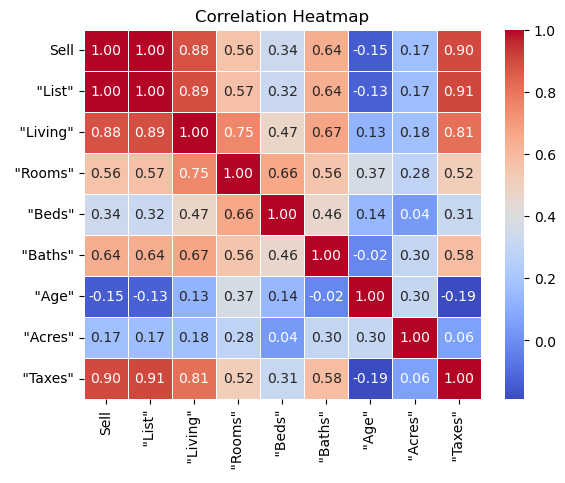

In [9]:
#4.c Heatmap

correlation_matrix = data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Finally, considering insights gather in the histogram and scatterplot, it is necessary to review the correlation for every variable in the data set, therfore, a heatmap of correlation is needed. In this heatmap it is shown that the most correlated variables for sell price are the list (makes sense considering the listed price is the desired price for selling), living (shown on the scatterplot above), and taxes (which makes sense considering you pay based on the value).It is also evidenced that the beds variable is not as correlated as we thought initially, as well as age.

In [15]:
#5) Using Taxes as the independent variable and Sell as the dependent variable, fit a linear regression model 
#and display the output from the model

#Library needed for LM
import statsmodels.api as sm

#Variables for the LM
X = data[column_8]
y = data[column_0]
X_const = sm.add_constant(X)

#Model
model = sm.OLS(y, X_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           7.22e-19
Time:                        15:40:21   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8719     11.691      1.443      0.1

#6) In addition to the model output include markdown commentary about the important statistics from the output; 
#is taxes a good predictor for selling price? Why or why not

For the linear model, the results are the following:
The intercept is 16.8719
The coefficient for 'Taxes' is 0.0414

This model gives an R squared of 0.809, suggesting that more than 80% of the variance in 'Sell' is explained by 'Taxes'.
Also it is evidenced that the p value is < 0.05, which matches that the 0.04114 is within the confidence interval

Therfore it is concluded that Taxes is a good predictor for selling price, considering the significance of the model, nevertheless, further analysis should be conducted since the coefficient is small, and the impact on price might need to include further variables.


In [17]:
#7) Repeat this procedure using one of the other variables as the independent variable. 
#Which model is "better"? What are some limitations of the model?

#Variables for the LM
X2 = data[column_2]
y2 = data[column_0]
X_const2 = sm.add_constant(X)

#Model
model = sm.OLS(y2, X_const2).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     163.7
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           4.39e-17
Time:                        15:54:24   Log-Likelihood:                -247.69
No. Observations:                  50   AIC:                             499.4
Df Residuals:                      48   BIC:                             503.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5531     13.579      0.630      0.5

For the linear model, the results are the following: The intercept is 8.5531 The coefficient for 'Living' is 7.6613

This model gives an R squared of 0.773, suggesting that more than 77% of the variance in 'Sell' is explained by 'Living'. Also it is evidenced that the p value is < 0.05, which matches that the 7.6613 is within the confidence interval

Therfore it is concluded that Living is a good predictor for selling price, considering the significance of the model, and also has a big impact on the selling price considering the coefficient

When answering the question of which model is better, the Taxes has a better R squared, meaning it is more accurate